In [178]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
from pympler.asizeof import asizeof

In [179]:
image = Image.open('china-original.png')
image = np.array(image)

In [180]:
svds_of_rgb = [np.linalg.svd(image[:,:,i]) for i in range(3)]

In [ ]:
decompressed_image = np.empty(shape=image.shape)
for index, (U, s, V) in enumerate(svds_of_rgb):
    [i] = min(np.argwhere(np.cumsum(s/sum(s))>.99))
    decompressed_image[:, :, index] = (U[:,:i] @ np.diag(s[:i]) @ V[:i,:])
decompressed_image = decompressed_image.astype(int)

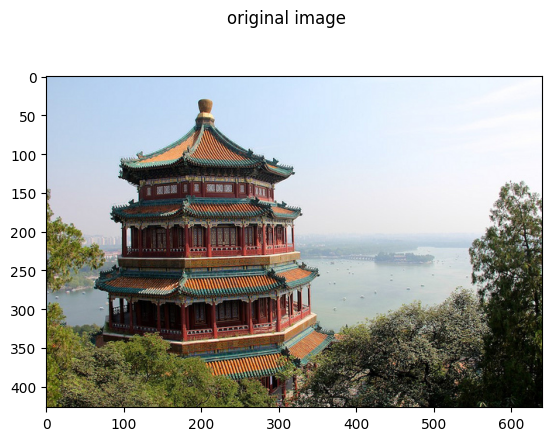

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


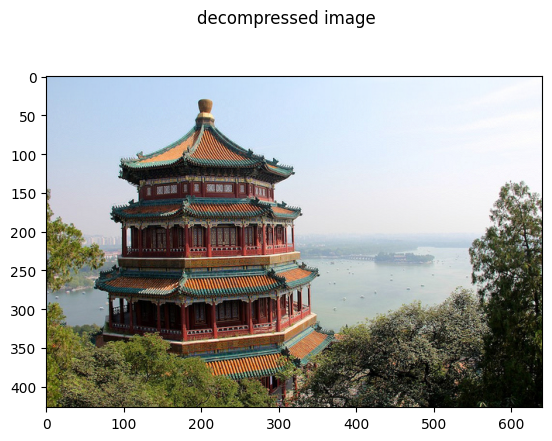

In [183]:
plt.figure().suptitle('original image')
plt.imshow(image)
plt.show()
plt.figure().suptitle('decompressed image')
plt.imshow(decompressed_image)
plt.show()